# Neural Networks

In this notebook, we'll look at how we can use scikit-learn to train neural networks for classification.

If you're interested in using neural networks beyond this camp, you probably won't want to use scikit-learn; you'll want to look into using something like TensorFlow.

To see how neural networks can be used for classification, we'll once again use the iris flower dataset. Remember that the features for this dataset are the four petal and sepal measurements, and the target is the species.

In [ ]:
import pandas as pd
import numpy as np

url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
iris_df = pd.read_csv(url)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Before we train a neural network, let's do a little exploratory data analysis. Here, we create a heat map, which tells us the correlations between the variables.

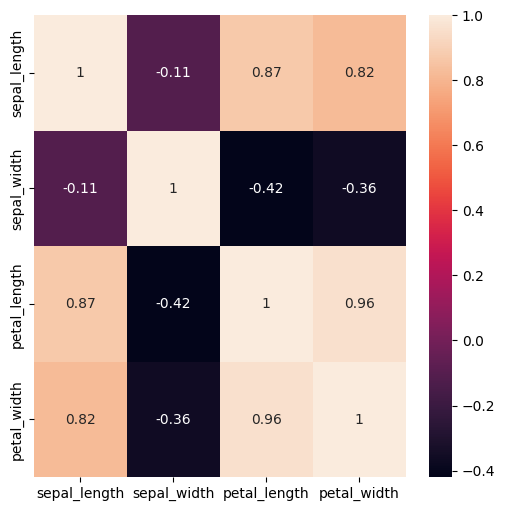

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

correlation_matrix = iris_df[feature_names].corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

From this correlation matrix, we can infer some relationships between variables.

For example, the correlation between petal length and petal width is 0.96, which indicates a very strong positive correlation between petal width and petal length. That is, if a flower has longer petals, it's likely to also have wider petals.

Interestingly, sepal width and sepal length have a negative correlation, so a flower with a wide sepal is less likely to have a long sepal. However, since this value is close to 0, it's a weak negative correlation.

Correlations close to 1 mean a strong positive correlation, and correlations close to -1 mean a strong negative correlation. 0 means no correlation (although this doesn't mean there's no relationship between the variables).

Now, let's train a neural network classifier. This is done using the function MLPClassifier, for which we specify the structure of the hidden layers, and how many training iterations we allow the neural network to take. Giving $(20,30,25)$ for the hidden layers specifies that we will have three hidden layers, the first with 20 neurons, the second with 30, and the third with 25. We set the number of iterations to 1000, which means our neural network will process the entire dataset 1000 times. Feel free to experiment by adjusting the number and size of the hidden layers, and changing the number of training iterations.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X = iris_df.loc[:, feature_names].values
y = iris_df.loc[:,'species'].values

scores = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

    mlp = MLPClassifier(hidden_layer_sizes = (20,30,25), max_iter=1000)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

print(np.average(scores))

That's pretty darn good accuracy!